# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Darell Jonathan]
- **Email:** [m293b4ky1001@bangkit.academy]
- **ID Dicoding:** [Darell Jonathan M293B4KY1001]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : How the weather can affected the number of bike rental?
- Pertanyaan 2 : what weekday that has a highest average rental value ?

## Import Semua Packages/Library yang Digunakan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'C:\\Users\\USER\\Submission'

## Data Wrangling

### Gathering Data

In [25]:
day_df = pd.read_csv ("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
hour_df = pd.read_csv ("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
mengambil data

### Assessing Data

In [29]:
day_df.info()
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
hour_df.info()
print("Jumlah duplikasi: ",day_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- stelah di analisis, tidak ada data yang hilang, duplikat, ataupun tidak valid dalam data day.csv dan hour.csv

### Cleaning Data

In [33]:
# tidak ada data

**Insight:**
karena tidak ada data yang hilang, duplikat, dan tidak valid maka tidak perlu cleaning data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [37]:
# Mapping dictionaries untuk conversi kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_map = {0: '2011', 1: '2012'}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
holiday_map = {0: 'Non-holiday', 1: 'Holiday'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# mapping header data "Day"
day_df['season'] = day_df['season'].map(season_map)
day_df['yr'] = day_df['yr'].map(year_map)
day_df['mnth'] = day_df['mnth'].map(month_map)
day_df['holiday'] = day_df['holiday'].map(holiday_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_map)

In [38]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Non-holiday,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Non-holiday,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Non-holiday,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Non-holiday,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Non-holiday,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
# Mapping dictionary untuk konversi kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_map = {0: '2011', 1: '2012'}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
holiday_map = {0: 'Non-holiday', 1: 'Holiday'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Penerapan mapping di data "hour"
hour_df['season'] = hour_df['season'].map(season_map)
hour_df['yr'] = hour_df['yr'].map(year_map)
hour_df['mnth'] = hour_df['mnth'].map(month_map)
hour_df['holiday'] = hour_df['holiday'].map(holiday_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_map)

In [40]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Non-holiday,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Non-holiday,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Non-holiday,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Non-holiday,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Non-holiday,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Merubah beberapa data numerikal menjadi kategorikal

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### How the weather can affected the number of bike rental?

C:\Users\USER\AppData\Local\Temp\ipykernel_19840\1508179617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_19840\1508179617.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=avg_rentals_by_weather, palette='coolwarm')


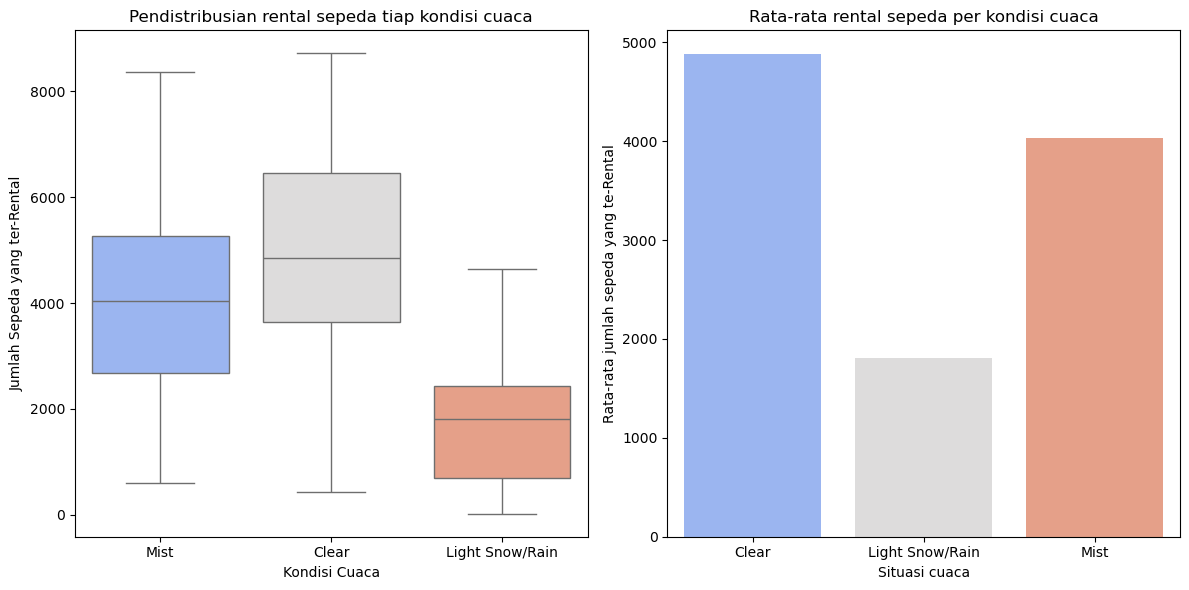

In [45]:
# Menerapkan area plot
plt.figure(figsize=(12, 6))

# Boxplot pendistribusian
plt.subplot(1, 2, 1)
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')
plt.title('Pendistribusian rental sepeda tiap kondisi cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda yang ter-Rental')

# Bar Plot rata rata rental tiap cuaca
plt.subplot(1, 2, 2)
avg_rentals_by_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()
sns.barplot(x='weathersit', y='cnt', data=avg_rentals_by_weather, palette='coolwarm')
plt.title('Rata-rata rental sepeda per kondisi cuaca')
plt.xlabel('Situasi cuaca')
plt.ylabel('Rata-rata jumlah sepeda yang te-Rental')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

### what day that has a highest average rental value ? 

C:\Users\USER\AppData\Local\Temp\ipykernel_19840\4084247493.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=rentals_by_weekday, palette='coolwarm')


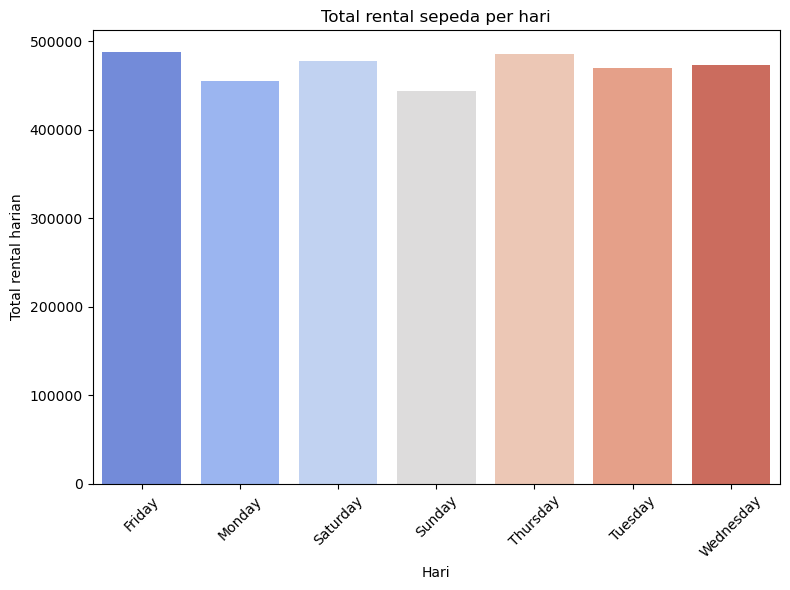

In [48]:
#
rentals_by_weekday = day_df.groupby('weekday')['cnt'].sum().reset_index()

# Men-set plot area
plt.figure(figsize=(8, 6))

# Bar plot to show total bike rentals per weekday
sns.barplot(x='weekday', y='cnt', data=rentals_by_weekday, palette='coolwarm')
plt.title('Total rental sepeda per hari')
plt.xlabel('Hari')
plt.ylabel('Total rental harian')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
Bar plot untuk menunjukkan total rental sepeda per hari

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: How the weather can affected the number of bike rental?
  Dalam Cuaca "clear" / cerah, rental sepeda mencapai titik rata - rata tertinggi. Di tempat kedua ada pada saat "mist" / berkabut. Dan yang terakhir ada pada saat hujan dan bersalju. 
  
- Conclution pertanyaan 2 : What day that has a highest average rental value ?
  bisa terlihat dari bar plot yang ada, rata-rata rental tertinggi berada pada hari jumat. Dan yang terendah adalah hari minggu.